# Song Popularity Dataset

License
CC0: Public Domain

https://www.kaggle.com/datasets/yasserh/song-popularity-dataset

Description from Kaggle:

Humans have greatly associated themselves with Songs & Music. It can improve mood, decrease pain and anxiety, and facilitate opportunities for emotional expression. Research suggests that music can benefit our physical and mental health in numerous ways.

Lately, multiple studies have been carried out to understand songs & it's popularity based on certain factors. Such song samples are broken down & their parameters are recorded to tabulate. Predicting the Song Popularity is the main aim.

The project is simple yet challenging, to predict the song popularity based on energy, acoustics, instumentalness, liveness, dancibility, etc. The dataset is large & it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?
Acknowledgement:

*The dataset is referred from Kaggle.*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
pd.options.display.float_format = '{:.6f}'.format

## Contents
* [EDA](#eda)
    * [Data pre-processing](#data_preprocessing)
    * [Data cleansing & analysis](#data_cleansing)
        * [Target song_popularity](#song_popularity)
        * [Features](#features_cleansing)
            * [song_duration_ms](#song_duration_ms)
            * [acousticness](#acousticness)
            * [danceability](#danceability)
            * [energy](#energy)
            * [instrumentalness](#instrumentalness)
            * [key](#key)
            * [liveness](#liveness)
            * [loudness](#loudness)
            * [audio_mode](#audio_mode)
            * [speechiness](#speechiness)
            * [tempo](#tempo)
            * [time_signature](#time_signature)
            * [audio_valence](#audio_valence)
    * [Multicollinearity](#multicollinearity)
    

## EDA <a class='anchor' id='eda'></a>

### Data pre-processing <a class='anchor' id='data_preprocessing'></a>

In [3]:
df = pd.read_csv('song_data.csv')
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496000,0.682000,0.000029,8,0.058900,-4.095000,1,0.029400,167.060000,4,0.474000
1,In The End,66,216933,0.010300,0.542000,0.853000,0.000000,3,0.108000,-6.407000,0,0.049800,105.256000,4,0.370000
2,Seven Nation Army,76,231733,0.008170,0.737000,0.463000,0.447000,0,0.255000,-7.828000,1,0.079200,123.881000,4,0.324000
3,By The Way,74,216933,0.026400,0.451000,0.970000,0.003550,0,0.102000,-4.938000,1,0.107000,122.444000,4,0.198000
4,How You Remind Me,56,223826,0.000954,0.447000,0.766000,0.000000,10,0.113000,-5.065000,1,0.031300,172.011000,4,0.574000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [5]:
target_cols = ['song_name', 'song_popularity']
target_cols

['song_name', 'song_popularity']

In [6]:
duplicates_before = df.duplicated().sum()
print(f'Number of full duplicates: {duplicates_before}')

df = df.drop_duplicates().reset_index(drop=True)

duplicates_after = df.duplicated().sum()
print(f'Number of full duplicates after cleansing: {duplicates_after}')

Number of full duplicates: 3909
Number of full duplicates after cleansing: 0


In [7]:
df[['song_name']].duplicated().sum()

1856

In [8]:
(
    df
        .groupby(['song_name', 'song_duration_ms'], as_index=False)['song_popularity']
        .count()
        .rename(columns={'song_popularity': 'cnt'})
        .sort_values(by='cnt', ascending=False)
        .query('cnt > 1')
)

,song_name,song_duration_ms,cnt
12769,Treat You Better,187973,4
7509,Love Myself,218773,4
7019,Legend,189120,4
9000,Old Pine,328506,3
11021,Sleep On The Floor,211851,3
...,...,...,...
2460,Cocaine,221640,2
13851,Woman,176306,2
11428,"Steady, As She Goes",215266,2
1187,Barbie Dreams,279866,2


In [9]:
df.query("song_name == 'Treat You Better' and song_duration_ms == 187973")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
4286,Treat You Better,84,187973,0.106000,0.444000,0.819000,0.000000,10,0.107000,-4.078000,0,0.341000,82.695000,4,0.747000
6073,Treat You Better,21,187973,0.128000,0.448000,0.817000,0.000000,10,0.105000,-4.069000,0,0.386000,83.015000,4,0.709000
7731,Treat You Better,43,187973,0.130000,0.748000,0.819000,0.000000,10,0.111000,-4.032000,0,0.198000,110.645000,3,0.792000
9891,Treat You Better,17,187973,0.132000,0.455000,0.797000,0.000000,10,0.110000,-4.133000,0,0.360000,165.717000,4,0.757000


In [10]:
df.query("song_name == 'Steady, As She Goes' and song_duration_ms == 215266")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
49,"Steady, As She Goes",64,215266,0.013200,0.524000,0.578000,0.009210,9,0.108000,-4.563000,1,0.120000,123.669000,4,0.537000
11007,"Steady, As She Goes",64,215266,0.008650,0.534000,0.605000,0.008260,9,0.078100,-4.366000,1,0.113000,123.003000,4,0.560000


In [11]:
df[df.drop(columns=target_cols).duplicated()].head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
1819,Breakeven,20,261426,0.173000,0.630000,0.698000,0.000000,10,0.078900,-4.510000,1,0.024400,94.023000,4,0.529000
1823,Dirrty,41,298853,0.107000,0.640000,0.889000,0.000000,2,0.339000,-3.073000,1,0.322000,99.931000,4,0.436000
2041,Cocaine,70,221640,0.060700,0.699000,0.502000,0.033700,9,0.317000,-12.526000,1,0.027800,105.266000,4,0.676000
2049,Maybe I’m Amazed - Remastered 2011,22,229826,0.387000,0.471000,0.494000,0.094400,7,0.617000,-10.407000,1,0.031200,79.255000,4,0.373000
2054,Band On The Run - Remastered 2010,30,313026,0.083200,0.479000,0.601000,0.001420,7,0.110000,-8.806000,1,0.031800,124.966000,4,0.669000


In [12]:
df.query("song_name == 'Maybe I’m Amazed - Remastered 2011' and song_duration_ms == 229826")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
385,Maybe I’m Amazed - Remastered 2011,65,229826,0.387000,0.471000,0.494000,0.094400,7,0.617000,-10.407000,1,0.031200,79.255000,4,0.373000
2049,Maybe I’m Amazed - Remastered 2011,22,229826,0.387000,0.471000,0.494000,0.094400,7,0.617000,-10.407000,1,0.031200,79.255000,4,0.373000


In [13]:
(
    df
        .groupby('song_name', as_index=False)['song_duration_ms']
        .count()
        .rename(columns={'song_duration_ms': 'cnt'})
        .sort_values(by='cnt', ascending=False)
        .query('cnt > 1')
)

,song_name,cnt
4681,Heaven,8
3799,Fire,8
10288,Stay,7
12663,You,7
1616,Breathe,7
...,...,...
12356,Who We Are,2
9280,Roses,2
4290,God Damn,2
10162,Sorry Not Sorry,2


In [14]:
df.query("song_name == 'Stay'")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
5361,Stay,59,94906,0.842000,0.555000,0.404000,0.000000,7,0.218000,-14.187000,0,0.062100,120.509000,4,0.736000
5414,Stay,84,204426,0.414000,0.479000,0.468000,0.000000,5,0.148000,-5.396000,1,0.027400,85.913000,4,0.350000
5498,Stay,41,211870,0.734000,0.671000,0.513000,0.032200,9,0.078800,-7.825000,0,0.048700,136.028000,4,0.435000
7738,Stay,76,240706,0.938000,0.621000,0.306000,0.000067,9,0.129000,-9.780000,0,0.026800,111.926000,4,0.085300
10250,Stay,61,217226,0.418000,0.522000,0.434000,0.000000,4,0.109000,-7.977000,1,0.032100,127.477000,4,0.172000
11819,Stay,41,176786,0.000426,0.468000,0.988000,0.000135,2,0.282000,-3.030000,1,0.140000,139.907000,4,0.376000
14642,Stay,51,245326,0.482000,0.231000,0.465000,0.000877,6,0.059300,-9.705000,1,0.037300,80.027000,4,0.266000


looks like those might be various estimations or rankings for a song >> leave as is, it provides some info how one song may be heard differently, therefore may have different popularity level

In [15]:
df.drop(columns=target_cols).describe()

,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000,14926.000000
mean,218949.581201,0.270453,0.624514,0.639763,0.092067,5.301152,0.180435,-7.677232,0.631917,0.099419,121.105007,3.952968,0.526967
std,62340.802753,0.298117,0.158081,0.221756,0.240451,3.592616,0.145097,4.018670,0.482300,0.103546,29.044644,0.316702,0.247758
min,12000.000000,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183943.500000,0.023600,0.524000,0.496000,0.000000,2.000000,0.093000,-9.389500,0.000000,0.037200,98.125000,4.000000,0.332000
50%,211845.500000,0.139000,0.636000,0.672000,0.000021,5.000000,0.122000,-6.750500,1.000000,0.054100,120.016000,4.000000,0.527000
75%,244720.000000,0.458000,0.740000,0.818000,0.005105,8.000000,0.224000,-4.991000,1.000000,0.113000,139.940750,4.000000,0.727750
max,1799346.000000,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


Intro overview of the features:

- song_duration_ms: some extra low/high values - mean&median close, doesn't have as strong variance as for other features, definately has some extreme values, but probably no heavy tails, check out for anomalies;

- acousticness: quite sparse data, skewed distribution, heavy right tail, some values (0) probably missing, check out distribution, normal range from 0 to 1 as power of feature presence;

- danceability: mean&median close, don't expect skewness, but has 0 which might be missing, normal range from 0 to 1 as power of feature presence;

- energy: as for dancebility - not large variance, seems to have no evident skewness, normal range from 0 to 1 as power of feature presence;

- instrumentals: seems to be too sparse, most of the values are close to 0, maybe it can be transformed into binary feature  either 1 or 0?;

- key: meaning? doesn't seem to be skewed, but needs to be checked against other features in terms of dependencies and influence;

- liveness: sparse, mostly present in lower bound, with heavy tail, looks like normal range is also from 0 to 1, but still might have outliers, check out distribution;

- loudness: mostly negative values, seems to have heavy left tail, check out distribution;

- audio_mode: probably binary feature with the majority being qual to 1;

- speechiness: sparse, skewed, with the majority of data having values less or equal to 0.1190, taking into account that normal range also seems to be from 0 to 1, check out distribution, outliers or probably groups of songs, which may have more speachiness - 'rap' or other genres;

- tempo: the majority seem to have more or less common tempo, while the range is still a question;

- time_signature: meaning? seems to be categorical - check dependencies and influence;

- audio_valence: no skewness at the first glance, normal range from 0 to 1 as power of feature presence;

In [16]:
categorical_cols = ['key', 'audio_mode', 'time_signature']

before further deeper analysis and cleansing, let's check out some evident dependencies, whether we can exclude some of them without spending too much time

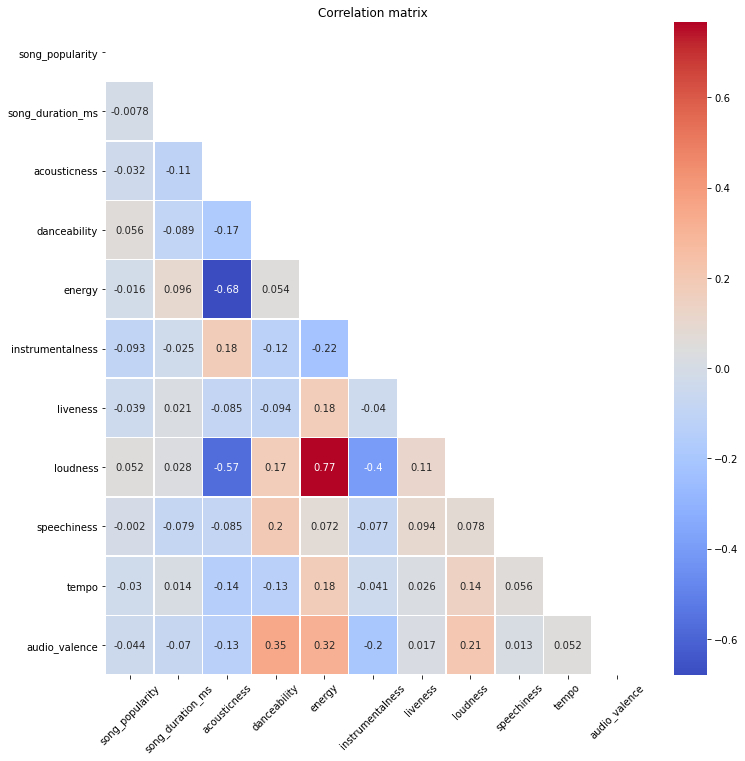

In [17]:
corr_matrix = df.drop(columns=['song_name'] + categorical_cols).corr()

plt.figure(figsize=(12,12))
sns.heatmap(
    data=corr_matrix,
    mask=np.triu(corr_matrix),
    annot=True,
    linewidth=0.5,
    cmap='coolwarm'
)
plt.title('Correlation matrix')
plt.xticks(rotation=45)
plt.show()

Looks like 'energy' has pretty strong connection with 'loudness', and it's positive.

And 'acousticness' has noticeable negative correlation with both of them - 'loudness' & 'energy'.

From those 3 features 'energy' seems to have lesser correlation with target feature 'song_popularity' then another 2 features, and at some point may be substituted by 'loudness', but 0.76 might not be reason to remove the feature, let's have a closer look later, and then decide.

Which is more fascinating, that almost none of those features has strong correlation with the target itself, but we still have some categorical features to examine, also let's consider extracting & creating some new features.

### Data cleansing & analysis <a class='anchor' id='data_cleansing'></a>

#### Target: song_popularity <a class='anchor' id='song_popularity'></a>

In [18]:
df.sample(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
8575,BLUE,36,213229,0.205000,0.580000,0.743000,0.000000,10,0.113000,-4.577000,0,0.431000,146.234000,4,0.557000
13075,Despacito (Featuring Daddy Yankee),45,228200,0.209000,0.660000,0.786000,0.000000,2,0.112000,-4.757000,1,0.170000,177.833000,4,0.846000
14744,Cocoa Hooves,51,252906,0.884000,0.636000,0.220000,0.007540,10,0.092500,-13.059000,1,0.046800,133.930000,4,0.040100
13378,Everybody Walkin' This Land,12,186111,0.842000,0.705000,0.424000,0.005010,7,0.204000,-8.459000,1,0.041200,96.056000,4,0.357000
901,She's so High,73,224693,0.200000,0.537000,0.840000,0.000002,9,0.099800,-4.626000,1,0.036300,124.269000,4,0.211000


In [19]:
df['song_popularity'].describe()

count   14926.000000
mean       48.750904
std        20.379465
min         0.000000
25%        37.000000
50%        52.000000
75%        63.750000
max       100.000000
Name: song_popularity, dtype: float64

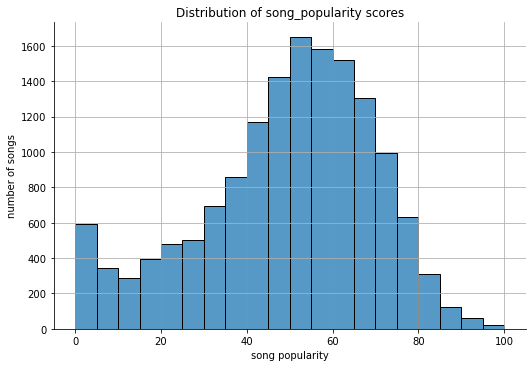

In [20]:
sns.displot(data=df, x='song_popularity', bins=20, aspect=1.5)
plt.title('Distribution of song_popularity scores')
plt.xlabel('song popularity')
plt.ylabel('number of songs')
plt.grid()
plt.show()

'song_popularity' lies between 0 and 100, most of the estimations are between 40 and 70, if there are some strong connections between other features and score, I hope it might not be an issue, otherwise such representation might at certain extend influence the prediction

#### Features <a class='anchor' id='features_cleansing'></a>

#### song_duration_ms <a class='anchor' id='song_duration_ms'></a>

In [21]:
df['song_duration_ms'].describe()

count     14926.000000
mean     218949.581201
std       62340.802753
min       12000.000000
25%      183943.500000
50%      211845.500000
75%      244720.000000
max     1799346.000000
Name: song_duration_ms, dtype: float64

In [22]:
df['song_duration_min'] = df['song_duration_ms']/1000/60

Initial data:


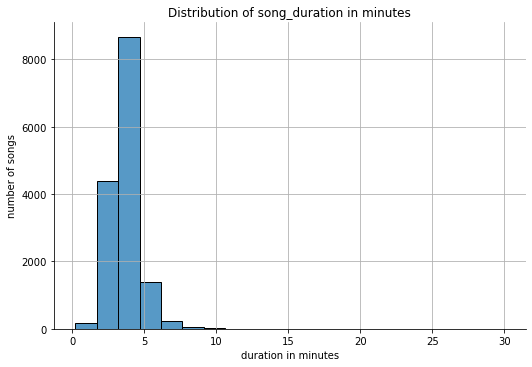

Without outliers:


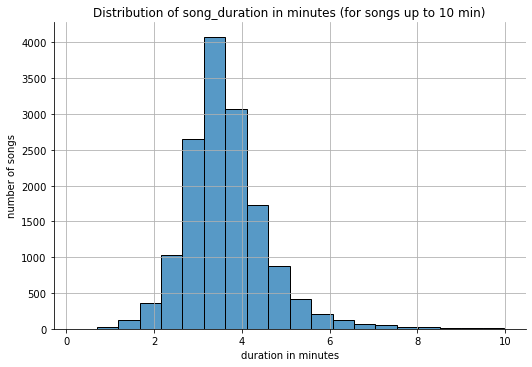

In [23]:
print('Initial data:')
sns.displot(data=df, x='song_duration_min', bins=20, aspect=1.5)
plt.title('Distribution of song_duration in minutes')
plt.xlabel('duration in minutes')
plt.ylabel('number of songs')
plt.grid()
plt.show()

print('Without outliers:')
sns.displot(data=df.query('song_duration_min < 10'), x='song_duration_min', bins=20, aspect=1.5)
plt.title('Distribution of song_duration in minutes (for songs up to 10 min)')
plt.xlabel('duration in minutes')
plt.ylabel('number of songs')
plt.grid()
plt.show()

without extreme values distribution itself looks pretty close to normal, but let's have a closer look at outliers, they may be valid data entries

In [24]:
long_songs_names = df[df['song_duration_min'] >= 10]['song_name']
print(long_songs_names)

233                                            El Cantante
311                                   The End - Remastered
469      2112: Overture / The Temples Of Syrinx / Disco...
491                                 Do You Feel Like We Do
1635                                       Shakara (Oloje)
1643                                                Zombie
3396     I Have a Dream - The Complete Speech of Martin...
3401                                            1960 What?
5540                             Marquee Moon - Remastered
6719                                             Last Call
8937                                 From Moment To Moment
9803                                             Mambo Inn
9815                                          Babarabatiri
12306                                              Go Bang
13725                                       Autobahn - 3-D
14281                                                 Play
14471                                     Army Arrangeme

In [25]:
df.loc[df['song_name'].isin(long_songs_names)].sort_values(by='song_name')

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_min
3401,1960 What?,22,747222,0.515000,0.511000,0.505000,0.000063,3,0.114000,-10.773000,1,0.042100,119.292000,4,0.622000,12.453700
469,2112: Overture / The Temples Of Syrinx / Disco...,53,1233666,0.078700,0.345000,0.795000,0.001650,2,0.180000,-7.440000,1,0.108000,134.141000,4,0.189000,20.561100
14471,Army Arrangement,23,1799346,0.468000,0.737000,0.849000,0.001870,0,0.086200,-5.587000,0,0.068800,98.162000,4,0.686000,29.989100
13725,Autobahn - 3-D,33,866889,0.200000,0.354000,0.561000,0.815000,2,0.125000,-13.781000,1,0.040700,149.900000,4,0.306000,14.448150
9815,Babarabatiri,0,833493,0.817000,0.501000,0.668000,0.629000,11,0.096600,-11.736000,0,0.061500,104.809000,4,0.919000,13.891550
491,Do You Feel Like We Do,48,836666,0.043900,0.295000,0.568000,0.011700,0,0.977000,-8.232000,1,0.028400,98.284000,4,0.384000,13.944433
233,El Cantante,58,622520,0.422000,0.489000,0.679000,0.000007,7,0.130000,-4.899000,0,0.032600,95.813000,4,0.658000,10.375333
8937,From Moment To Moment,39,736160,0.678000,0.461000,0.422000,0.844000,10,0.646000,-14.101000,1,0.036700,134.791000,4,0.139000,12.269333
12306,Go Bang,35,664573,0.007450,0.730000,0.912000,0.458000,1,0.214000,-8.146000,1,0.053000,126.971000,4,0.756000,11.076217
14493,Go Bang,58,189092,0.071400,0.598000,0.893000,0.015900,2,0.146000,-3.072000,1,0.031900,120.972000,4,0.485000,3.151533


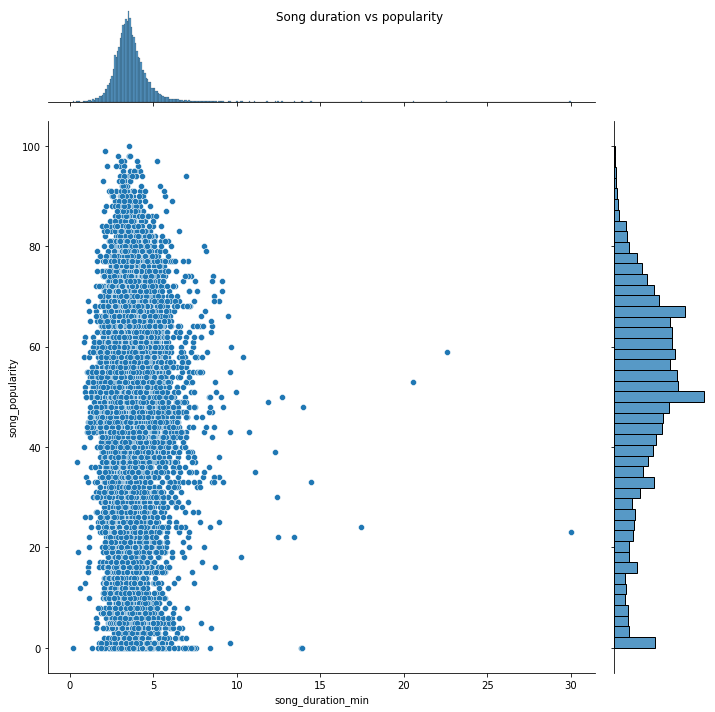

In [26]:
(
    sns.jointplot(data=df,
                  x='song_duration_min',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song duration vs popularity')
)
plt.show()

based on the names themselves such long duration may be real, also, even though some songs might have another entries with the same names, looks like those are still valid but different songs, and we don't know much about the source and don't have access to it, so all the points should remain and we'll deal with this skewness on the later steps

also there is no noticeable dependency between duration of a song and its popularity

#### acousticness <a class='anchor' id='acousticness'></a>

In [27]:
df['acousticness'].describe()

count   14926.000000
mean        0.270453
std         0.298117
min         0.000001
25%         0.023600
50%         0.139000
75%         0.458000
max         0.996000
Name: acousticness, dtype: float64

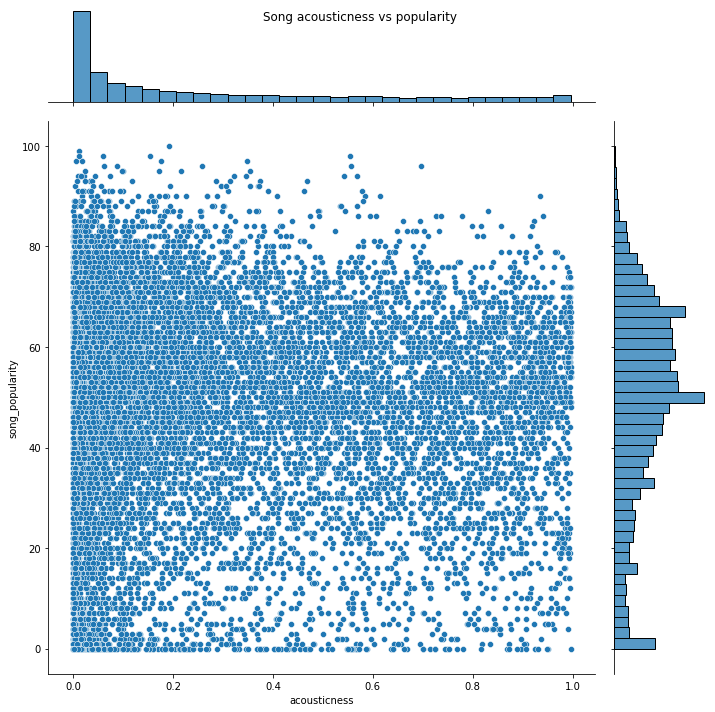

In [28]:
(
    sns.jointplot(data=df,
                  x='acousticness',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song acousticness vs popularity')
)
plt.show()

no noticeable dependency expect that top 20 songs more likely would have acousticness from 0 up to 0.2, but still it is not a strict criteria

let's have a closer look at other two features, which are higly correlated with acousticness: loudness & energy

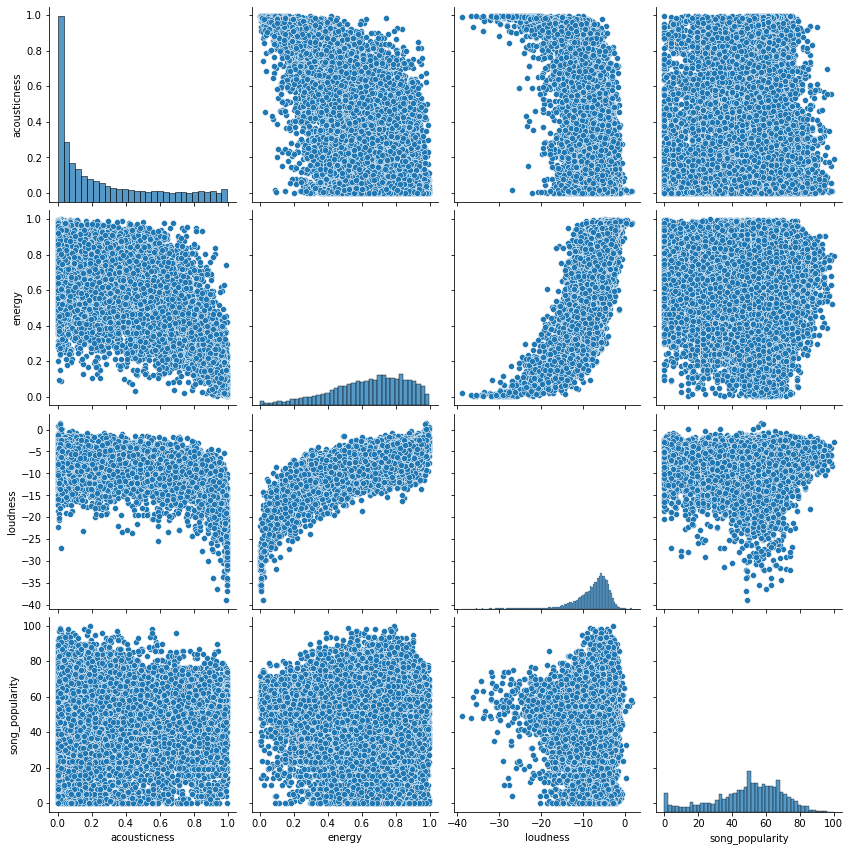

In [29]:
sns.pairplot(
    data=df,
    x_vars=['acousticness', 'energy', 'loudness', 'song_popularity'],
    y_vars=['acousticness', 'energy', 'loudness', 'song_popularity'],
    height=3
)
plt.show()

seems like the louder the song is the more energetic it appears to be for listener, 

while loudness has more clear or more or less distinguishable connection either with song_popularity or acousticness, 

or at least areas where higher/lower loudness is more likely (than energy) may correspond to some levels of song_popularity or acousticness

#### danceability <a class='anchor' id='danceability'></a>

In [30]:
df['danceability'].describe()

count   14926.000000
mean        0.624514
std         0.158081
min         0.000000
25%         0.524000
50%         0.636000
75%         0.740000
max         0.987000
Name: danceability, dtype: float64

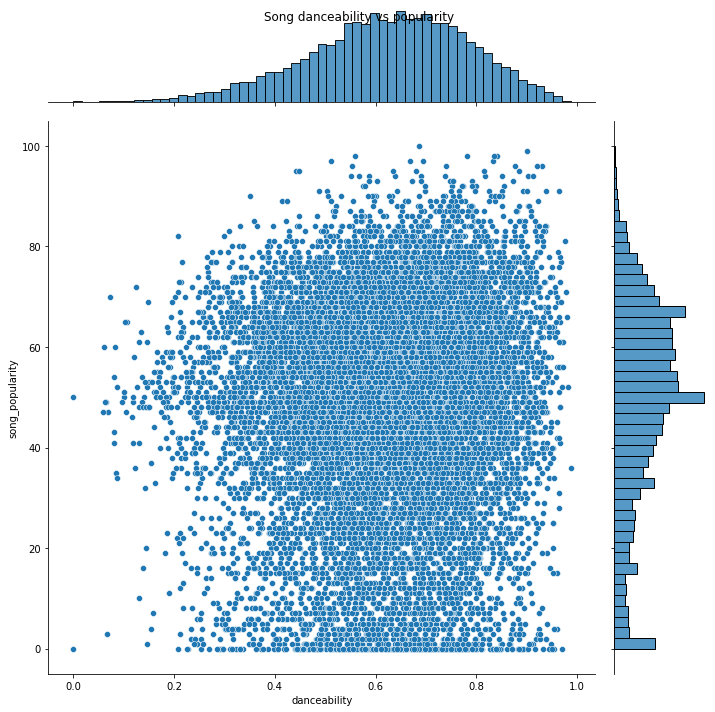

In [31]:
(
    sns.jointplot(data=df,
                  x='danceability',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song danceability vs popularity')
)
plt.show()

most songs have danceability within 0.5-0.8, 

even though there is no direct dependency, songs which have higher popularity are more likely to have higher danceability as well, but high danceability itself doesn't guarantee high popularity

#### energy <a class='anchor' id='energy'></a>

In [32]:
df['energy'].describe()

count   14926.000000
mean        0.639763
std         0.221756
min         0.001070
25%         0.496000
50%         0.672000
75%         0.818000
max         0.999000
Name: energy, dtype: float64

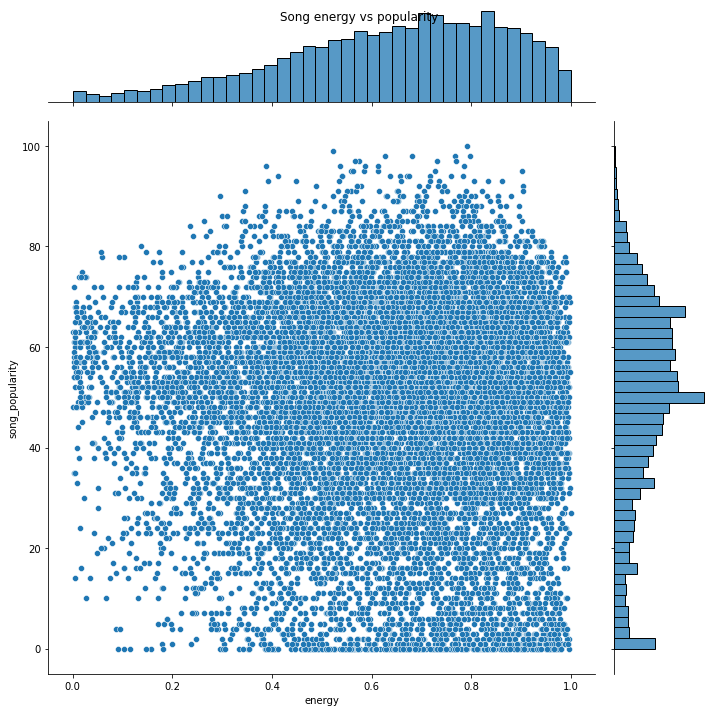

In [33]:
(
    sns.jointplot(data=df,
                  x='energy',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song energy vs popularity')
)
plt.show()

most songs have energy 0.5-0.9,

and again the same case as with danceability -  no direct dependency, songs which have higher popularity are more likely to have higher energy, but high energy itself doesn't guarantee high popularity

but it's interesting, that while describing common characteristics, there is not that strong interconnection between danceability and energy

#### loudness <a class='anchor' id='loudness'></a>

In [34]:
df['loudness'].describe()

count   14926.000000
mean       -7.677232
std         4.018670
min       -38.768000
25%        -9.389500
50%        -6.750500
75%        -4.991000
max         1.585000
Name: loudness, dtype: float64

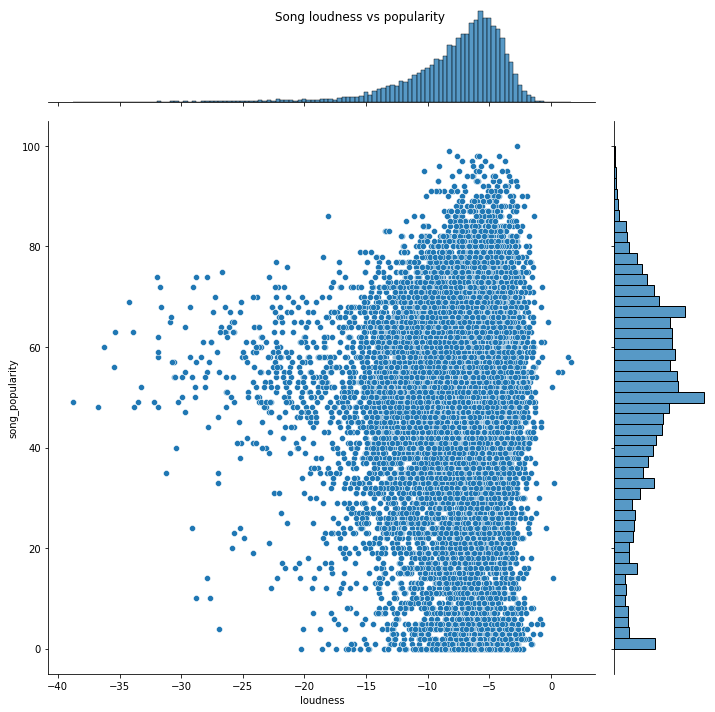

In [35]:
(
    sns.jointplot(data=df,
                  x='loudness',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song loudness vs popularity')
)
plt.show()

even though the scale is negative, among the popular ones there are more songs with higher value of loudness, but loudness itself is still not a guarantee of popularity

#### instrumentalness <a class='anchor' id='instrumentalness'></a>

In [36]:
df['instrumentalness'].describe()

count   14926.000000
mean        0.092067
std         0.240451
min         0.000000
25%         0.000000
50%         0.000021
75%         0.005105
max         0.997000
Name: instrumentalness, dtype: float64

Initial data:


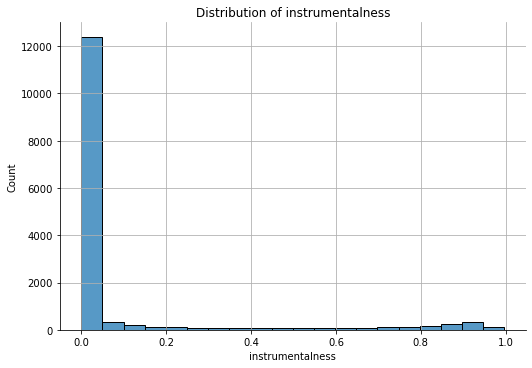

Without values less than 0.1:


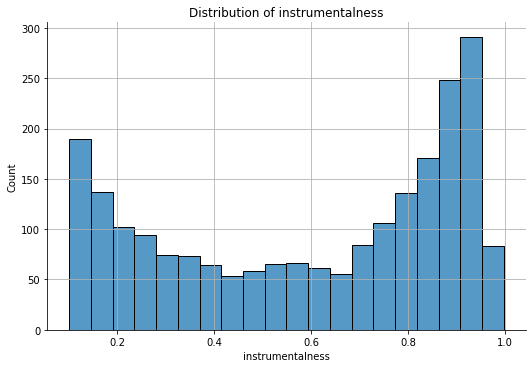

In [37]:
print('Initial data:')
sns.displot(data=df, x='instrumentalness', bins=20, aspect=1.5)
plt.title('Distribution of instrumentalness')
plt.grid()
plt.show()

print('Without values less than 0.1:')
sns.displot(data=df.query('instrumentalness > 0.1'), x='instrumentalness', bins=20, aspect=1.5)
plt.title('Distribution of instrumentalness')
plt.grid()
plt.show()

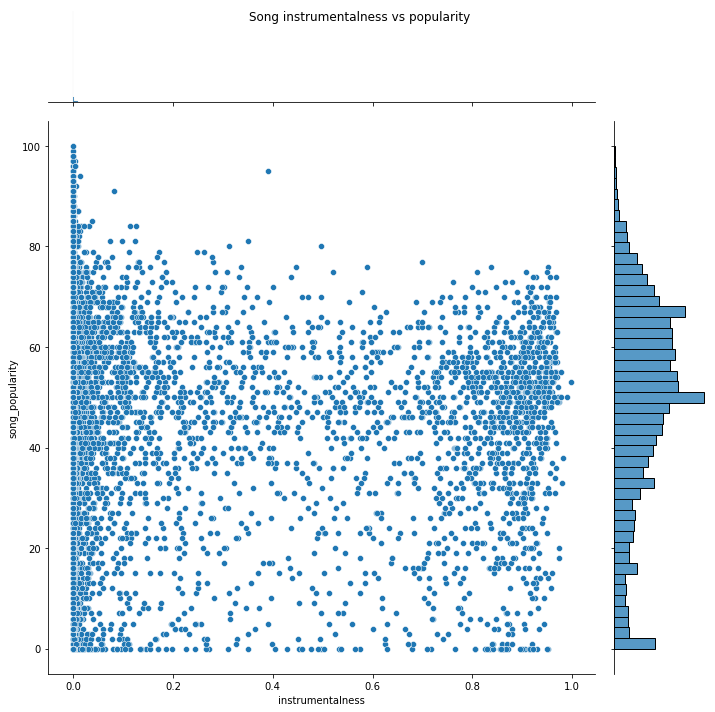

In [38]:
(
    sns.jointplot(data=df,
                  x='instrumentalness',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song instrumentalness vs popularity')
)
plt.show()

again no clear connestion with target, probably with combinations of features there will be some logical branches

taking into account huge number of extra low values, probably it may have more sense to transform it into 4 caretories with "extra low", "low", "average", "high" instrumentals

In [39]:
df['instrumentalness_lvl'] = df['instrumentalness'].apply(lambda x: 
                                                            1 if x <= 0.1 else
                                                            2 if x <= 0.3 else
                                                            3 if x <= 0.7
                                                            else 4)
(
    df
        .groupby('instrumentalness_lvl', as_index=False)['instrumentalness']
        .agg([np.min, np.mean, np.median, np.max])
)

,amin,mean,median,amax
instrumentalness_lvl,,,,
1,0.000000,0.003932,0.000005,0.100000
2,0.101000,0.182697,0.173000,0.300000
3,0.301000,0.497998,0.499500,0.700000
4,0.702000,0.864633,0.879000,0.997000


more or less mean & median are close within groups except the lowest group, which is essentially a stock for all extra small values

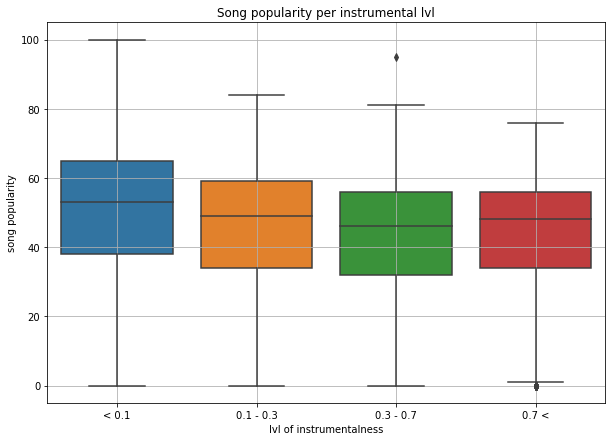

In [40]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df, y='song_popularity', x='instrumentalness_lvl')
ax.set_xticklabels(['< 0.1', '0.1 - 0.3', '0.3 - 0.7', '0.7 <'])
plt.title('Song popularity per instrumental lvl')
plt.xlabel('lvl of instrumentalness')
plt.ylabel('song popularity')
plt.grid()
plt.show()

which is also interesting, that instrumentalness has positive correlation with acousticness, which makes sense and negative correlation with loudness and energy, since those songs typically tend to have less instrumental parts

#### key <a class='anchor' id='key'></a>

In [41]:
df['key'].value_counts(normalize=True).reset_index().sort_values(by='index')

,index,key
0,0,0.116173
2,1,0.106794
4,2,0.093729
11,3,0.029010
7,4,0.072625
5,5,0.084215
8,6,0.070213
1,7,0.110813
9,8,0.070146
3,9,0.094466


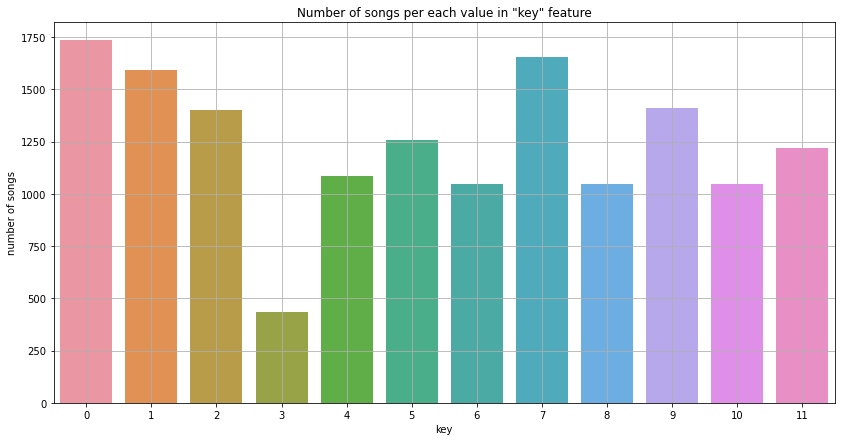

In [42]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='key')
plt.title('Number of songs per each value in "key" feature')
plt.xlabel('key')
plt.ylabel('number of songs')
plt.grid()
plt.show()

from first look not that much difference in number of songs between groups except probably group 3, since the source is unavailable, let's suppose those may be some categories

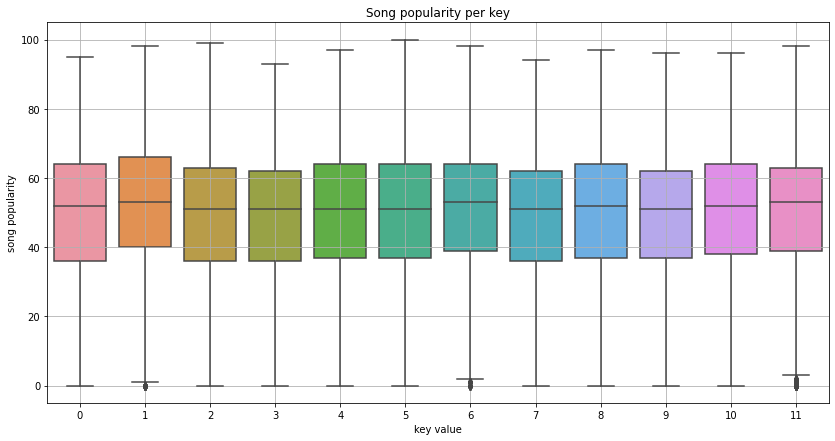

In [43]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, y='song_popularity', x='key')
plt.title('Song popularity per key')
plt.xlabel('key value')
plt.ylabel('song popularity')
plt.grid()
plt.show()

again not much of direct connection with target variable, for the majority of groups difference may be insignificant

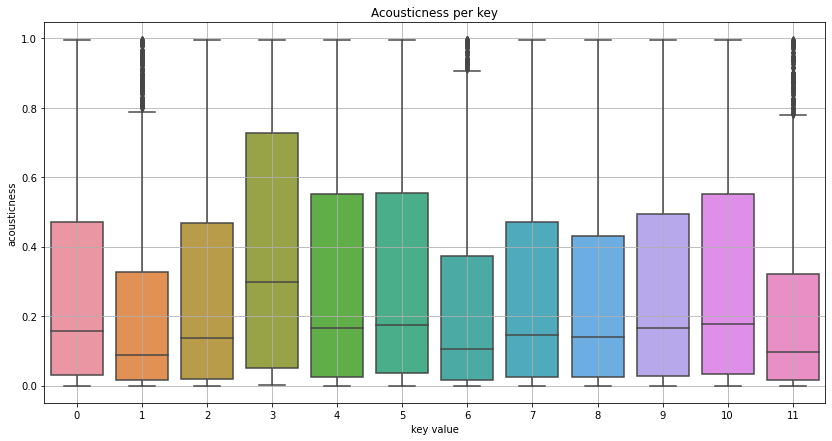

In [44]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, y='acousticness', x='key')
plt.title('Acousticness per key')
plt.xlabel('key value')
plt.ylabel('acousticness')
plt.grid()
plt.show()

more or less dictinguishable groups per 'key', maybe key identifies some styles or music directions

#### liveness <a class='anchor' id='liveness'></a>

In [45]:
df['liveness'].describe()

count   14926.000000
mean        0.180435
std         0.145097
min         0.010900
25%         0.093000
50%         0.122000
75%         0.224000
max         0.986000
Name: liveness, dtype: float64

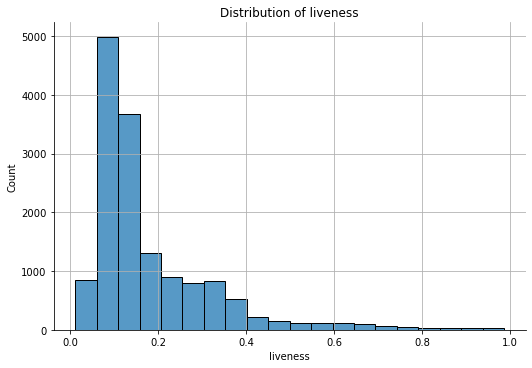

In [46]:
sns.displot(data=df, x='liveness', bins=20, aspect=1.5)
plt.title('Distribution of liveness')
plt.grid()
plt.show()

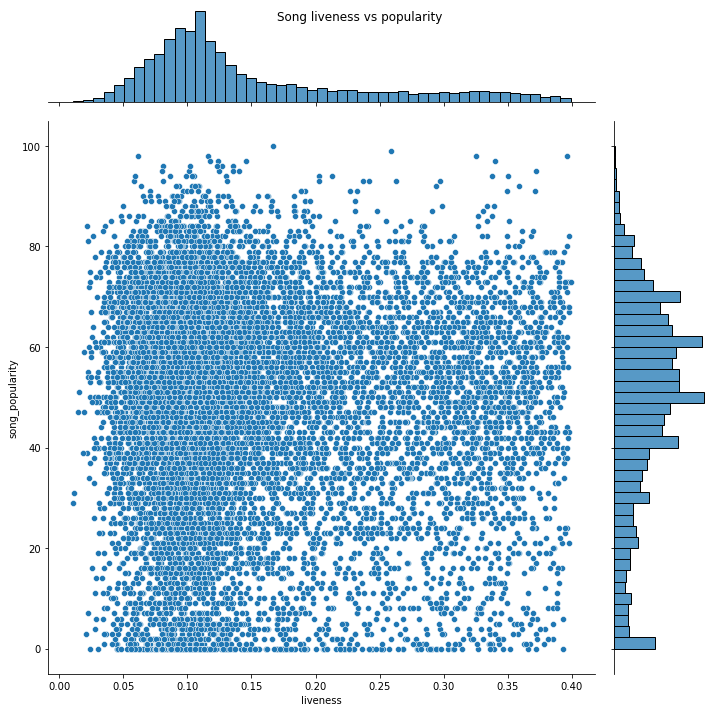

In [47]:
(
    sns.jointplot(data=df.query('liveness < 0.4'),
                  x='liveness',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song liveness vs popularity')
)
plt.show()

again no clear dependency, except probably proportions, that more popular songs usually have less 'liveness'

#### audio_mode <a class='anchor' id='audio_mode'></a>

In [48]:
df['audio_mode'].value_counts(normalize=True)

1   0.631917
0   0.368083
Name: audio_mode, dtype: float64

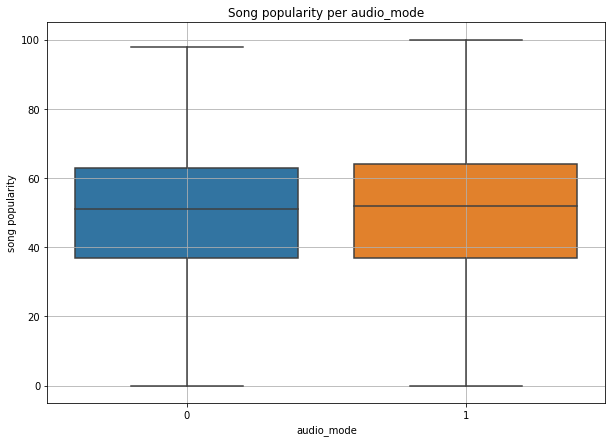

In [49]:
plt.figure(figsize=(10,7))
ax = sns.boxplot(data=df, y='song_popularity', x='audio_mode')
plt.title('Song popularity per audio_mode')
plt.xlabel('audio_mode')
plt.ylabel('song popularity')
plt.grid()
plt.show()

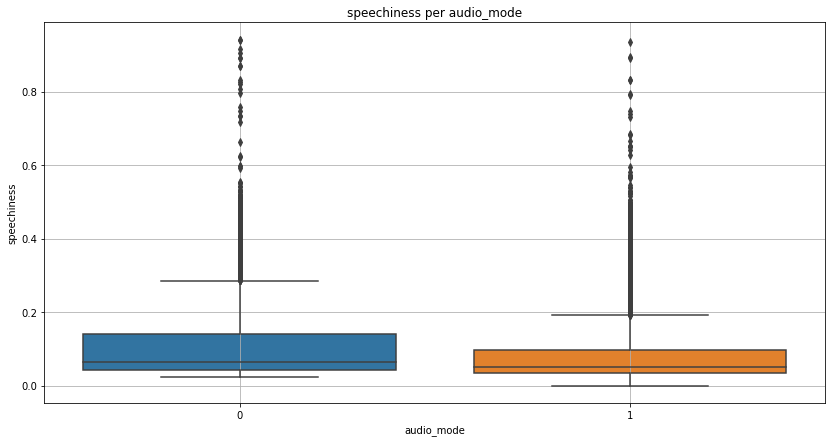

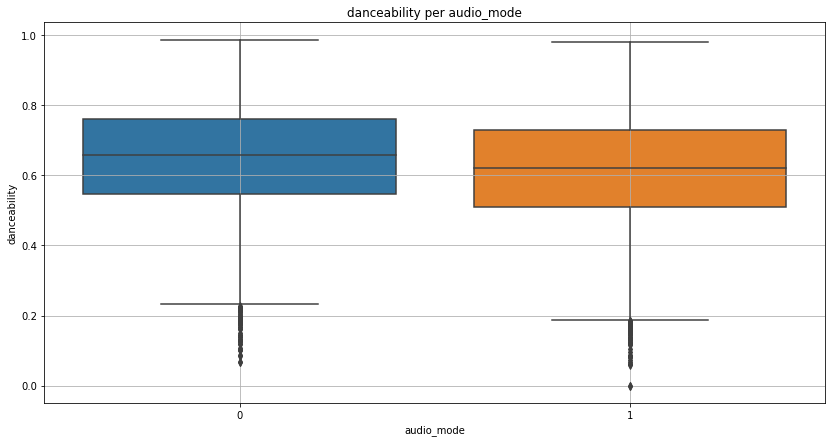

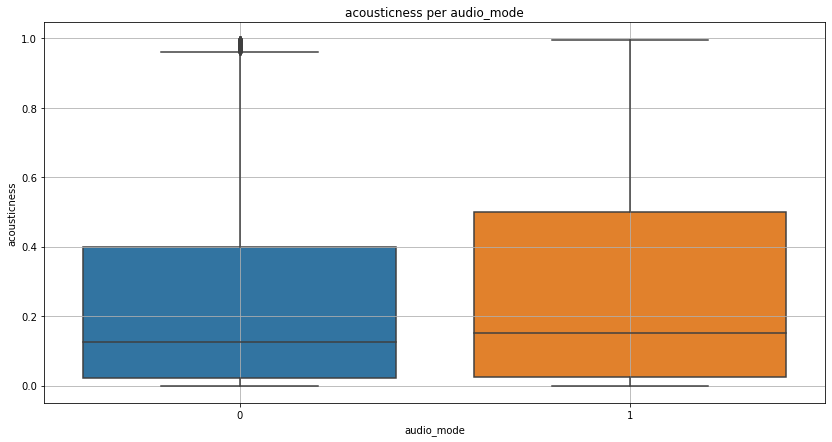

In [50]:
for feature in ['speechiness', 'danceability', 'acousticness']:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=df, y=feature, x='audio_mode')
    plt.title(f'{feature} per audio_mode')
    plt.xlabel('audio_mode')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

some features that seem somehow to be dependent from audio_mode, but audio_mode itself doesn't seem to define song_popularity on its own

#### speechiness <a class='anchor' id='speechiness'></a>

In [51]:
df['speechiness'].describe()

count   14926.000000
mean        0.099419
std         0.103546
min         0.000000
25%         0.037200
50%         0.054100
75%         0.113000
max         0.941000
Name: speechiness, dtype: float64

In [52]:
sum(df['speechiness']<= 0.1)

10778

Initial data:


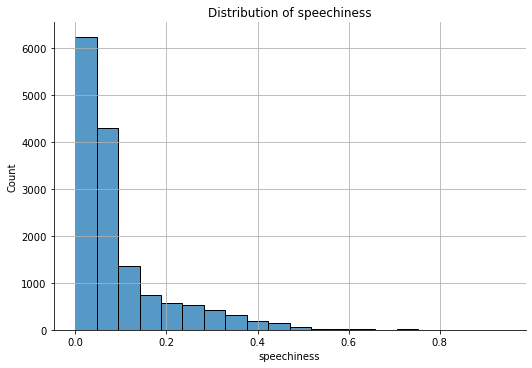

Without values less than 0.15:


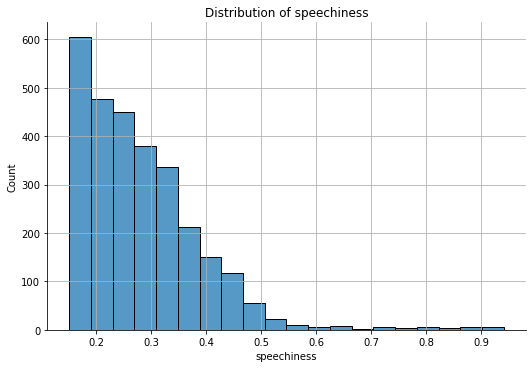

In [53]:
print('Initial data:')
sns.displot(data=df, x='speechiness', bins=20, aspect=1.5)
plt.title('Distribution of speechiness')
plt.grid()
plt.show()

print('Without values less than 0.15:')
sns.displot(data=df.query('speechiness > 0.15'), x='speechiness', bins=20, aspect=1.5)
plt.title('Distribution of speechiness')
plt.grid()
plt.show()

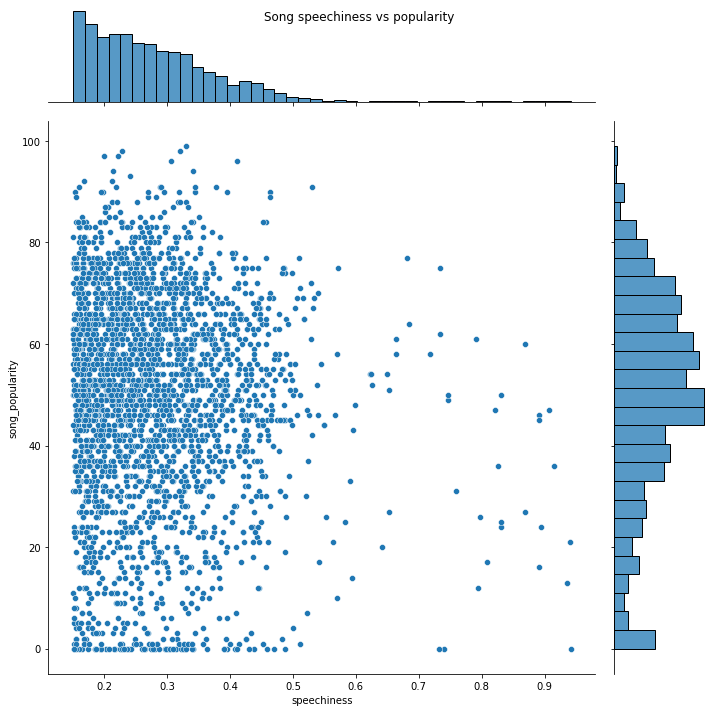

In [54]:
(
    sns.jointplot(data=df.query('speechiness > 0.15'),
                  x='speechiness',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song speechiness vs popularity')
)
plt.show()

looks like it may be more usefull to transform this feature into levels of speechiness:
- 1 = up to 0.15
- 2 0.15 - 0.35
- 3 0.35 - 0.5
- 4 greater that 0.5

In [55]:
df['speechiness_lvl'] = df['speechiness'].apply(lambda x: 
                                                    1 if x <= 0.15 else
                                                    2 if x <= 0.35 else
                                                    3 if x <= 0.5
                                                    else 4)
(
    df
        .groupby('speechiness_lvl', as_index=False)['speechiness']
        .agg([np.min, np.mean, np.median, np.max])
)

,amin,mean,median,amax
speechiness_lvl,,,,
1,0.000000,0.056432,0.046000,0.150000
2,0.151000,0.238246,0.233000,0.350000
3,0.351000,0.408057,0.403000,0.500000
4,0.503000,0.655213,0.597000,0.941000


groups seem to be contain more or less close values (median VS mean)

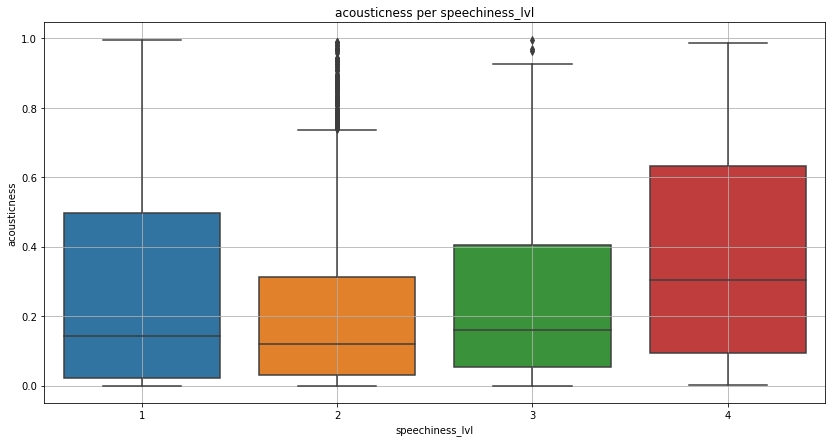

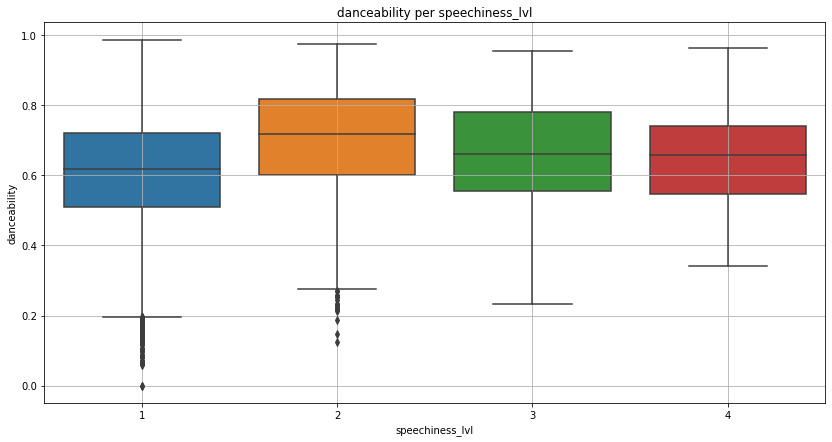

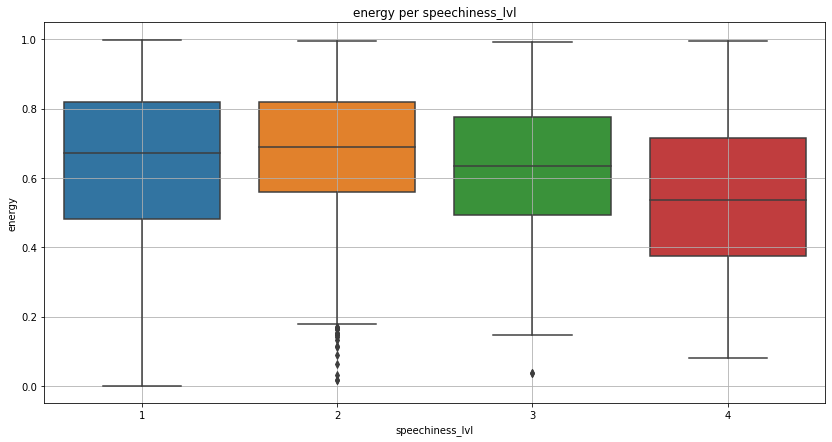

In [56]:
for feature in ['acousticness', 'danceability', 'energy']:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=df, y=feature, x='speechiness_lvl')
    plt.title(f'{feature} per speechiness_lvl')
    plt.xlabel('speechiness_lvl')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

some features that seem to have at least any reaction on speechiness levels

#### tempo <a class='anchor' id='tempo'></a>

In [57]:
df['tempo'].describe()

count   14926.000000
mean      121.105007
std        29.044644
min         0.000000
25%        98.125000
50%       120.016000
75%       139.940750
max       242.318000
Name: tempo, dtype: float64

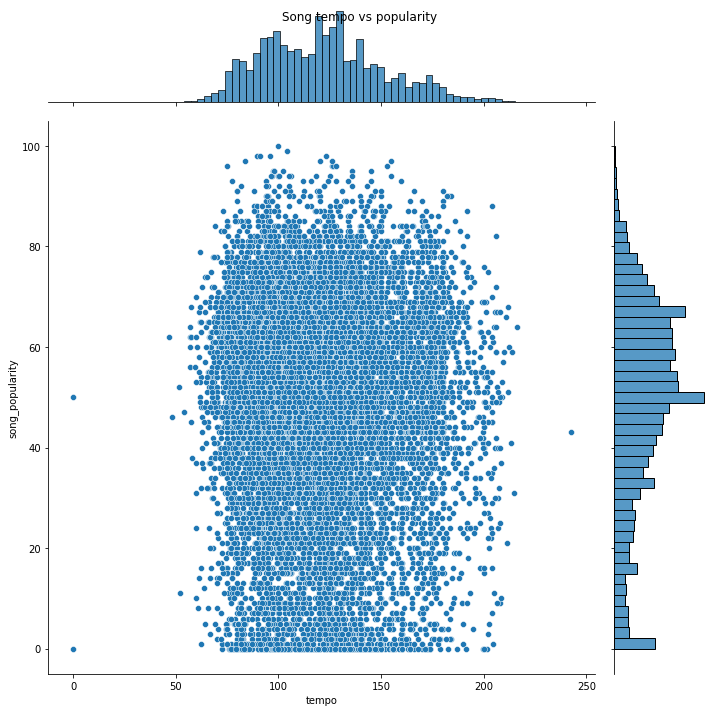

In [58]:
(
    sns.jointplot(data=df,
                  x='tempo',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song tempo vs popularity')
)
plt.show()

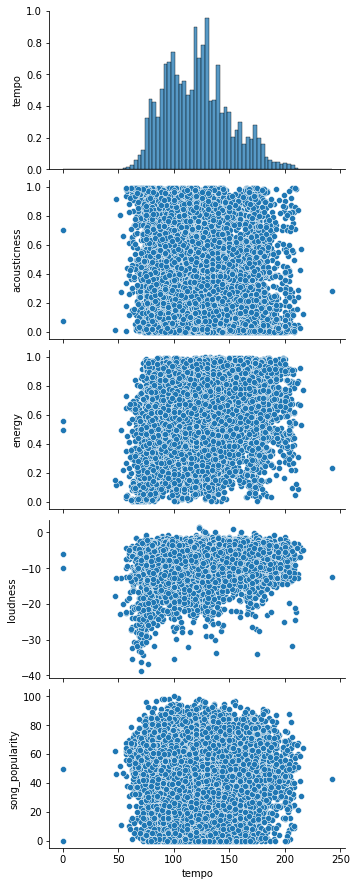

In [59]:
sns.pairplot(
    data=df,
    y_vars=['tempo', 'acousticness', 'energy', 'loudness', 'song_popularity'],
    x_vars=['tempo'],
    aspect=2
)
plt.show()

no clear connection with target and other features, except loudness: less loud songs usually tend to be lower in tempo as well

#### time_signature <a class='anchor' id='time_signature'></a>

In [60]:
df['time_signature'].value_counts(normalize=True)

4   0.936420
3   0.045826
5   0.013064
1   0.004489
0   0.000201
Name: time_signature, dtype: float64

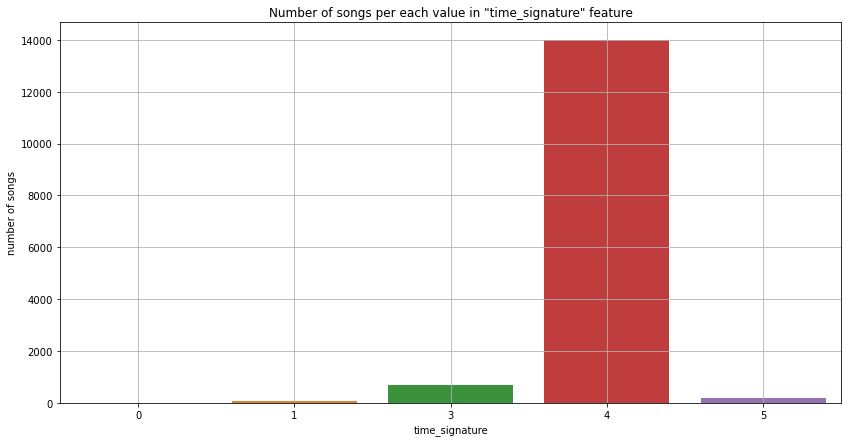

In [61]:
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='time_signature')
plt.title('Number of songs per each value in "time_signature" feature')
plt.xlabel('time_signature')
plt.ylabel('number of songs')
plt.grid()
plt.show()

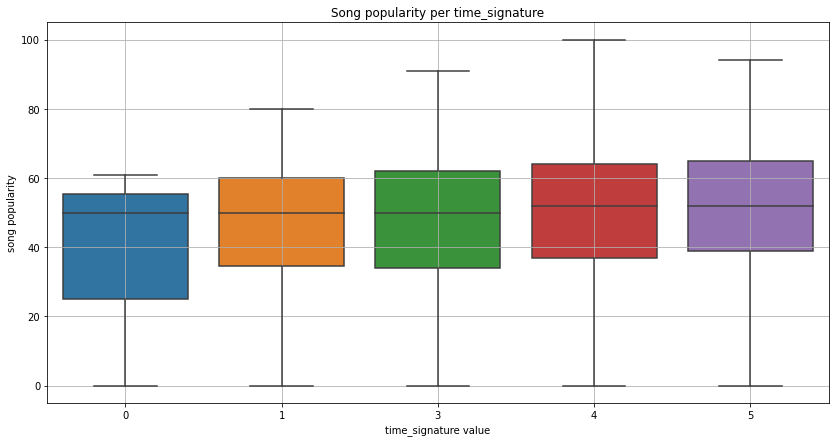

In [62]:
plt.figure(figsize=(14,7))
sns.boxplot(data=df, y='song_popularity', x='time_signature')
plt.title('Song popularity per time_signature')
plt.xlabel('time_signature value')
plt.ylabel('song popularity')
plt.grid()
plt.show()

even though the majority of dataset has time_signature equal to 4, and song_popularity doesn't seem to react that much on different levels of this feature there are some other features that seem to be divided into more distinguishable groups

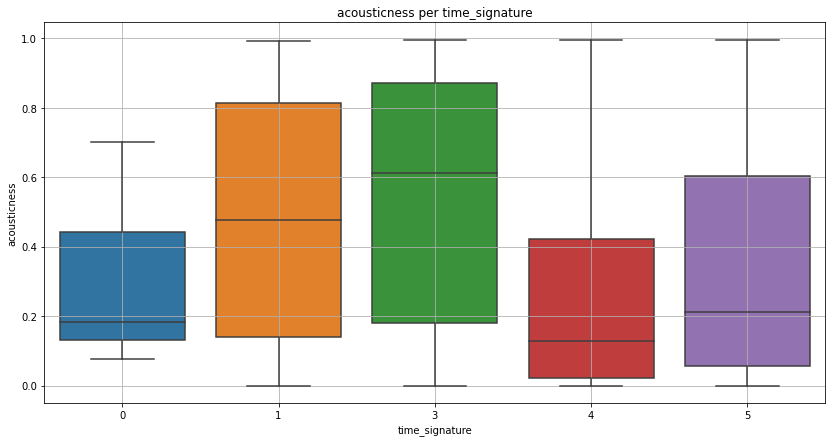

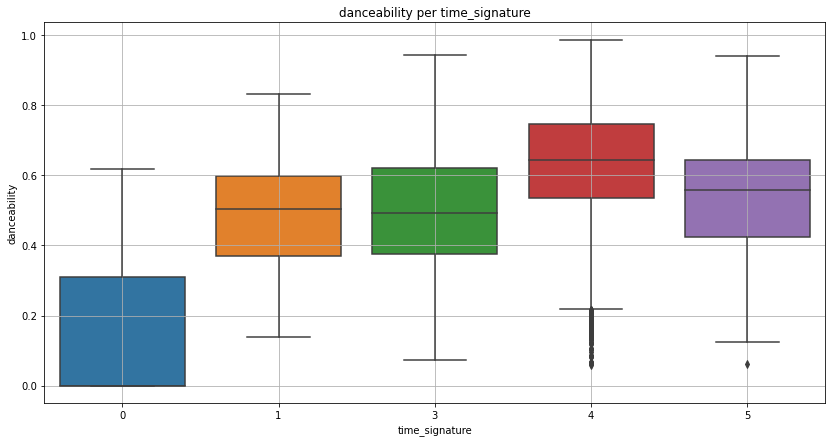

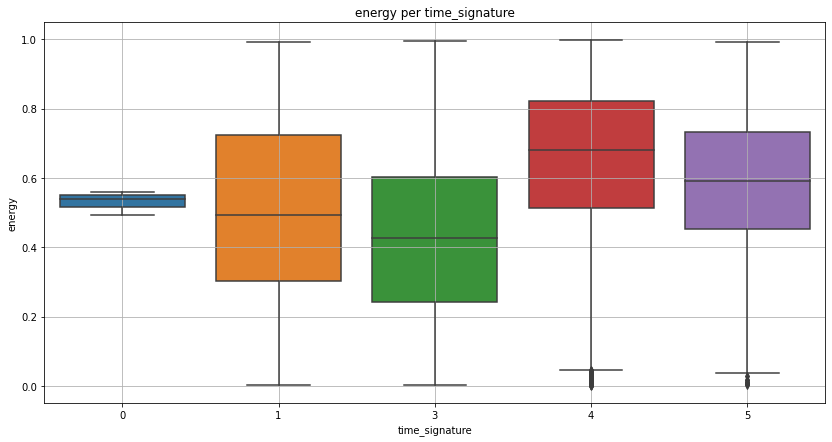

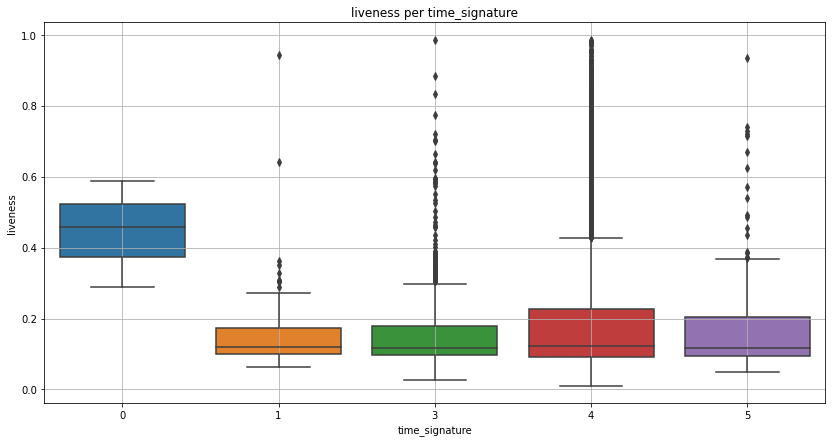

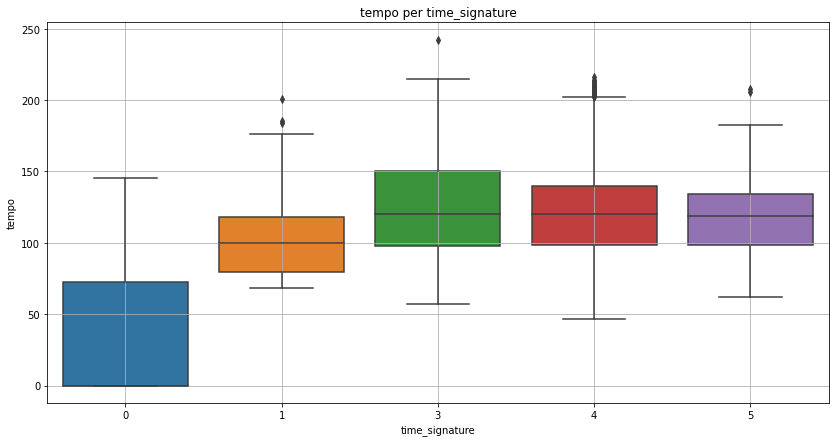

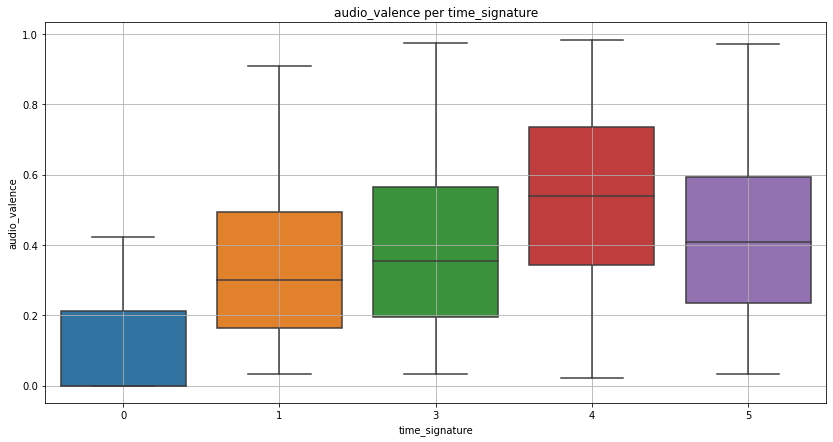

In [63]:
for feature in ['acousticness', 'danceability', 'energy', 'liveness', 'tempo', 'audio_valence']:
    plt.figure(figsize=(14,7))
    sns.boxplot(data=df, y=feature, x='time_signature')
    plt.title(f'{feature} per time_signature')
    plt.xlabel('time_signature')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

#### audio_valence <a class='anchor' id='audio_valence'></a>

In [64]:
df['audio_valence'].describe()

count   14926.000000
mean        0.526967
std         0.247758
min         0.000000
25%         0.332000
50%         0.527000
75%         0.727750
max         0.984000
Name: audio_valence, dtype: float64

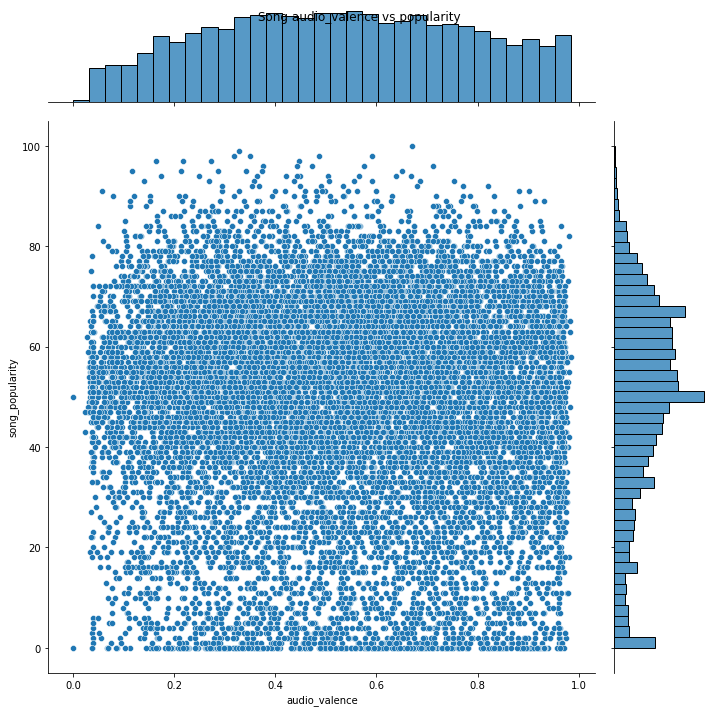

In [65]:
(
    sns.jointplot(data=df,
                  x='audio_valence',
                  y='song_popularity',
                  height=10)
        .fig.suptitle('Song audio_valence vs popularity')
)
plt.show()

very low correlation with the target, probably in combination with other features it may be of some use

### Multicollinearity <a class='anchor' id='multicollinearity'></a>

since we potentially have highly dependent features, let's check them for multicollinearity, 

let's first remove the categorical analogues that we created to substitute some of the features in order to estimate their original connections, because they are definately multicollinear with their substitutes:

- song_duration_min
- instrumentalness_lvl
- speechiness_lvl

In [66]:
X = df.drop(columns=[
    'song_name', 
    'song_popularity', 
    'song_duration_min', 
    'instrumentalness_lvl', 
    'speechiness_lvl'
])
X = X.assign(constant=1) # to make variance_inflation_factor() work properly
(
    pd.DataFrame([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
                 index=X.columns,
                 columns=['variance_inflation_factor'])
        .sort_values(by='variance_inflation_factor', ascending=False)
)

,variance_inflation_factor
constant,286.293888
energy,3.875542
loudness,3.020331
acousticness,2.040395
danceability,1.425308
audio_valence,1.414077
instrumentalness,1.263813
speechiness,1.094349
tempo,1.071699
audio_mode,1.059309


so based on VIF there is no noticeable multicollinearity between features (no features with values of VIF higher than 5), there are some correlations, but not that strong to exclude some of the features